# 서울의 기온이 가장 높았던 날의 날짜와 기온 구하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./Seoul_Temp/seoul.csv', encoding='cp949')

df.fillna(-100, inplace=True)

max_temp = -999
date = ''

for t in df.values:
    if t[-1] > max_temp:
        max_temp = t[-1]
        date = t[0]

print(f'서울의 기온이 가장 높았던 날의 날짜는 {date}이고 기온은 {max_temp}이다.')

서울의 기온이 가장 높았던 날의 날짜는 2018-08-01이고 기온은 39.6이다.


# 내 생일의 기온 변화를 그래프로 그리기

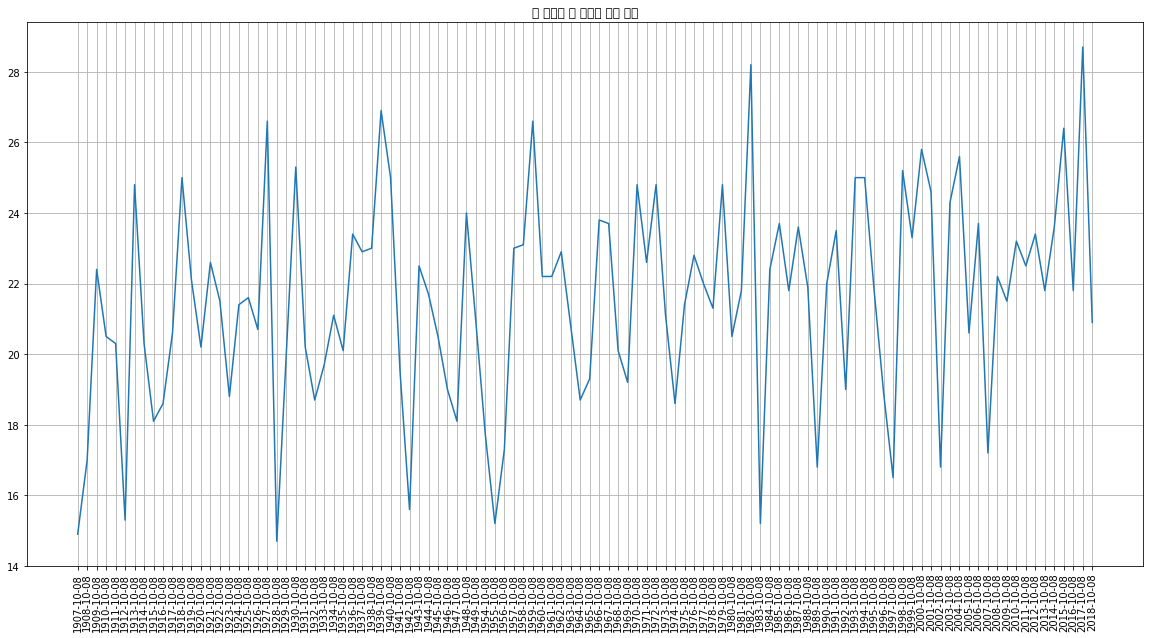

In [2]:
import csv 
import matplotlib.pyplot as plt
import numpy as np

f = open('./Seoul_Temp/seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

date = []
result = []

for row in data:
    if row[4] != '':
        if row[0].split('-')[1] == '10' and row[0].split('-')[2] == '08':
            result.append(float(row[4]))
            date.append(row[0])

sort_result = sorted(result)

x = np.arange(len(date))
y = np.arange(len(result))

plt.figure(figsize=(20,10))
plt.plot(x, result)
plt.xticks(x, date, rotation=90)
plt.title('내 생일의 각 연도별 최고 온도')
plt.rc('font', family = 'NanumGothic')
plt.rc('font', size=10)
plt.grid(True)
plt.show()

# 서울의 최고 기온 데이터를 상자 그림으로 표현하기

min: -16.3
1/4: 0.9
1/2: 12.3
3/4: 30.3
max: 39.6


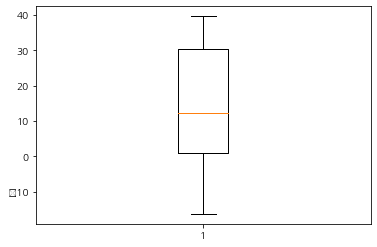

In [3]:
import csv 
import numpy as np
import matplotlib.pyplot as plt

f = open('./Seoul_Temp/seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data) 

result = []

for row in data:
    if row[4] != '':
        if row[0].split('-')[1] =='01' or row[0].split('-')[1] == '08':
            result.append(float(row[4]))

sort_result = sorted(result)

y_result = np.array(sort_result)

plt.boxplot(sort_result)

print(f'min: {np.percentile(y_result, 0)}')
print(f'1/4: {np.percentile(y_result, 25)}')
print(f'1/2: {np.percentile(y_result, 50)}')
print(f'3/4: {np.percentile(y_result, 75)}')
print(f'max: {np.percentile(y_result, 100)}')

# 제주도의 성별 인구 비율 표현하기

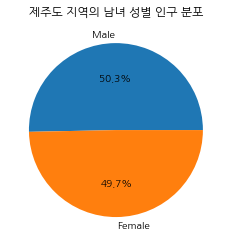

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Population_public_data/gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

name = input()

m = []

for row in data:
    if name in row[0]:
        m.append(row[1])
        m.append(row[104])

label = ['Male', 'Female']

plt.pie(m, labels=label, autopct='%.1f%%')
plt.title('제주도 지역의 남녀 성별 인구 분포')
plt.show()

# 꺾은선 그래프로 표현하기 

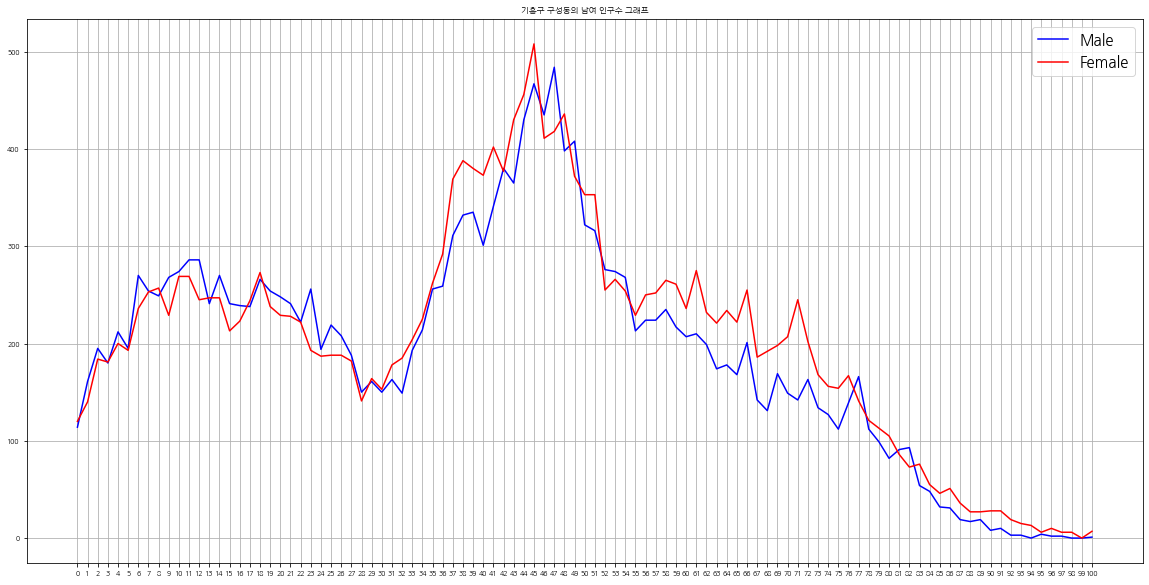

In [20]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Population_public_data/gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

m = []
f = []

name = input()

for row in data:
    row[3:] = map(int, row[3:])
    if name in row[0]:
        m.append(row[3:104])
        f.append(row[106:])

m_array = np.array(m).ravel().tolist()
f_array = np.array(f).ravel().tolist()

x = np.arange(len(m_array))

plt.figure(figsize=(20,10))
plt.plot(x, m_array, 'b', label='Male')
plt.plot(x, f_array, 'r', label='Female')
plt.xticks(x)
plt.title(f'{name}의 남여 인구수 그래프')
plt.rc('font', family='NanumGothic', size=8)
plt.legend(loc='upper right', fontsize=15)
plt.grid(True)
plt.show()

# 막대그래프로 표현하기

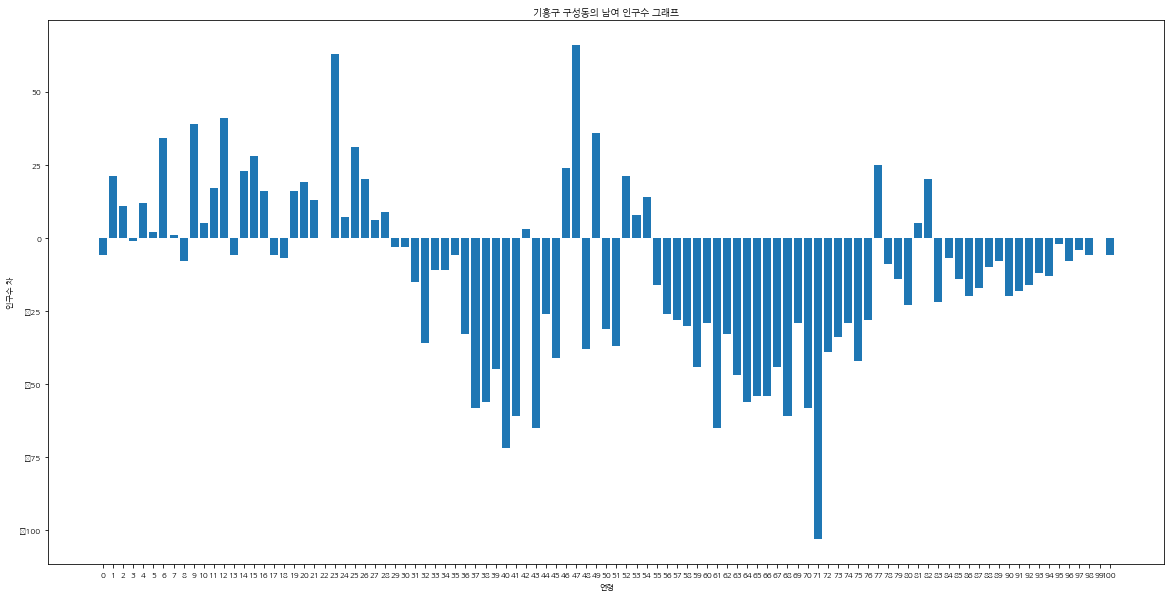

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Population_public_data/gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

m = []
f = []

name = input()

for row in data:
    row[3:] = map(int, row[3:])
    if name in row[0]:
        m = row[3:104]
        f = row[106:]

m_array = np.array(m)
f_array = np.array(f)

x = np.arange(0,101)

result = m_array - f_array

plt.figure(figsize=(20,10))
plt.bar(x, result)
plt.xticks(x)
plt.xlabel('연령')
plt.ylabel('인구수 차')
plt.title(f'{name}의 남여 인구수 그래프')
plt.rc('font', family='NanumGothic', size=8)
plt.show()

# 제주도의 연령대별 성별 비율을 산점도로 표현하기

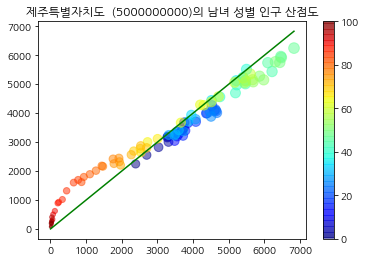

In [12]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

f = open('./Population_public_data/gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

name = input()

m = []
f = []

for row in data: 
    row[3:] = map(int, row[3:])
    if name in row[0]:
        m = row[3:104]
        f = row[106:]

x = np.arange(101)

m1 = np.array(m)
f1 = np.array(f)

size = m1 + f1
size_ = []

for d in size:
    size_.append(math.sqrt(d))

plt.scatter(m,f,s=size_, c=x, alpha=0.5, cmap='jet') # s= 마커 크기 값(또는 배열), c=마커 색 값(또는 배열)
plt.colorbar()
plt.title(f'{name}의 남녀 성별 인구 산점도')
plt.plot(range(max(m1)), range(max(m1)), 'g')
plt.rc('font', family='NanumGothic')
plt.show()

# 유임 승차 비율이 가장 높은 역은 어디일까 

In [17]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Traffic_data/subwayfee.csv', encoding='cp949')
data = csv.reader(f)
next(data)

rate_max = 0
station = ''

for row in data:
    row[4:] = map(int, row[4:])
    rate = row[4] / (row[4] + row[6])
    if row[4] + row[6] >= 100000:
        if rate > rate_max:
            rate_max = rate
            station = row[3]

print(f'유임 승차 비율이 가장 높은 역은 {station}이고 비율은 {round(rate_max,2)}%이다.')

유임 승차 비율이 가장 높은 역은 홍대입구이고 비율은 0.95%이다.


# 유무임 승하차 인원이 가장 많은 역은 어디일까

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('./Traffic_data/subwayfee.csv', encoding='cp949')
data = csv.reader(f)
next(data)

max1 = 0
max2 = 0
max3 = 0
max4 = 0

mx_station1 = ''
mx_station2 = ''
mx_station3 = ''
mx_station4 = ''

for row in data:
    row[4:] = map(int, row[4:])
    if row[4] > max1:
        max1 = row[4]
        mx_station1 = row[3]
    if row[5] > max2:
        max2 = row[5]
        mx_station2 = row[3]
    if row[6] > max3:
        max3 = row[6]
        mx_station3 = row[3]
    if row[7] > max4:
        max4 = row[7]
        mx_station4 = row[3]

print(f'유임승차 인원이 많은 역은 {mx_station1}역 이고 인원 수는 {max1}이다.')
print(f'유임승차 인원이 많은 역은 {mx_station2}역 이고 인원 수는 {max2}이다.')
print(f'유임승차 인원이 많은 역은 {mx_station3}역 이고 인원 수는 {max3}이다.')
print(f'유임승차 인원이 많은 역은 {mx_station4}역 이고 인원 수는 {max4}이다.')

유임승차 인원이 많은 역은 강남역 이고 인원 수는 3153418이다.
유임승차 인원이 많은 역은 강남역 이고 인원 수는 3210437이다.
유임승차 인원이 많은 역은 종로3가역 이고 인원 수는 387062이다.
유임승차 인원이 많은 역은 제기동역 이고 인원 수는 400607이다.


# 모든 역의 유무임 승하차 비율은 어떻게 될까

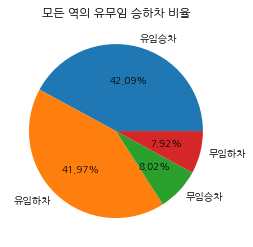

In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('./Traffic_data/subwayfee.csv', encoding='cp949')
data = csv.reader(f)
next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']

count1 = 0
count2 = 0
count3 = 0
count4 = 0

for row in data:
    row[4:] = map(int, row[4:])
    count1 += row[4] 
    count2 += row[5] 
    count3 += row[6] 
    count4 += row[7] 
    
rows = []
rows.append(round(count1/598,2))
rows.append(round(count2/598,2))
rows.append(round(count3/598,2))
rows.append(round(count4/598,2))

plt.pie(rows,labels=label, autopct='%.2f%%')
plt.title('모든 역의 유무임 승하차 비율')
plt.rc('font', family='NanumGothic')
plt.show()

# 출근 시간대 사람들이 가장 많이 타는 역은 어디일까

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('./Traffic_data/subwaytime.csv', encoding='cp949')
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append((row[3], sum(row[11:16:2])))

mx = 0
mx_station = 0

for xvalue, yvalue in result:
    if yvalue > mx:
        mx = yvalue
        mx_station = xvalue

print(f'출근 시간대 사람들이 가장 많이 타는 역은 {mx_station}역 이고 인원수는 {mx}명이다.')

출근 시간대 사람들이 가장 많이 타는 역은 강남역 이고 인원수는 984427명이다.


# 출근 시간대 사람들이 가장 많이 내리는 역은 어디일까

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('./Traffic_data/subwaytime.csv', encoding='cp949')
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append((row[3], sum(row[10:15:2])))

mx = 0
mx_station = 0

for xvalue, yvalue in result:
    if yvalue > mx:
        mx = yvalue
        mx_station = xvalue

print(f'출근 시간대 사람들이 가장 많이 타는 역은 {mx_station}역 이고 인원수는 {mx}명이다.')

출근 시간대 사람들이 가장 많이 타는 역은 신림역 이고 인원수는 809541명이다.


# 밤 11시에 사람들이 가장 많이 타는 역은 어디일까

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('./Traffic_data/subwaytime.csv', encoding='cp949')
data = csv.reader(f)
next(data)
next(data)

t = int(input())

i = 4 + (t-4)*2

mx = 0
mx_station = ''

for row in data:
    row[4:] = map(int, row[4:])
    if row[i] > mx:
        mx = row[i]
        mx_station = row[3]

print(f'밤 11시에 사람들이 가장 많이 타는 역은 {mx_station}역 이고 인원수는 {mx}명이다.')

밤 11시에 사람들이 가장 많이 타는 역은 강남역 이고 인원수는 145504명이다.


# 시간대별로 사람들이 가장 많이 타는 역은 어디일까

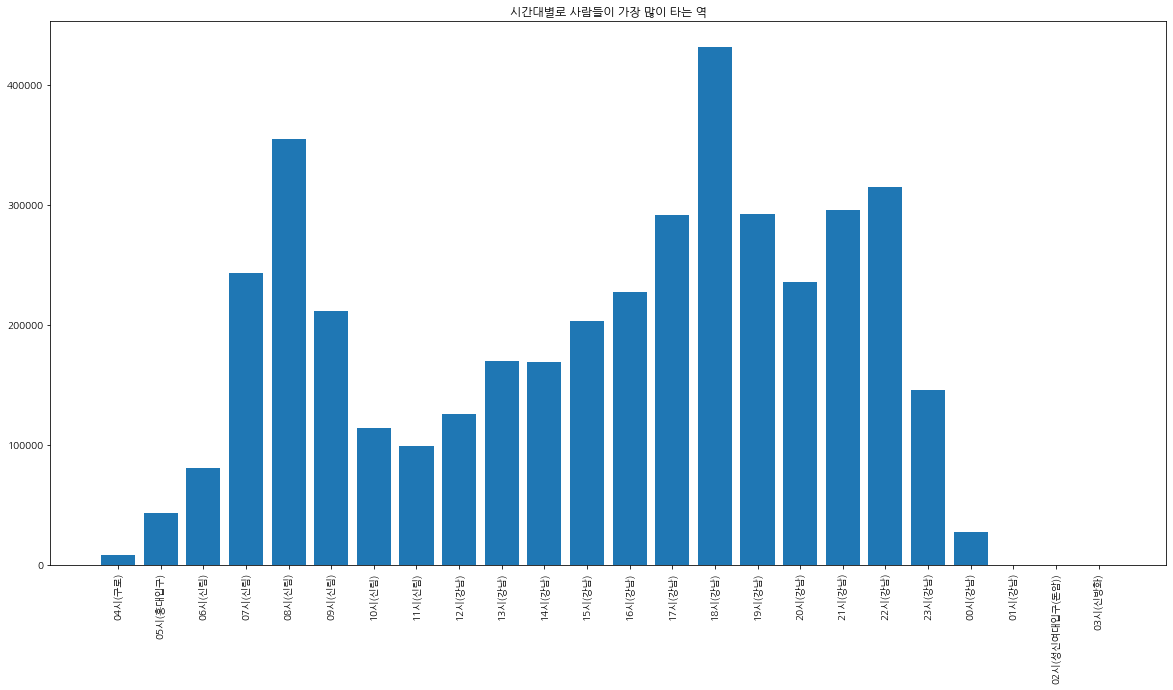

In [23]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('./Traffic_data/subwaytime.csv', encoding='cp949')
data = csv.reader(f)

label = []

yvalue = [0 for i in range(24)]
max_location = ['' for i in range(24)]
for i, row in enumerate(data):
    if i == 0:
        label = row[4:52:2]
    elif i == 1:
        continue
    else:
        row[4:] = map(int, row[4:])
        for j in range(24):
            if yvalue[j] < row[j*2 +4]:
                yvalue[j] = row[j*2 + 4]
                max_location[j] = row[3]

xvalue = []
for v,l in zip(label, max_location):
    hour = v.split(':')[0]
    xvalue.append(f'{hour}시({l})')

plt.figure(figsize=(20,10))
plt.bar(xvalue, yvalue)
plt.xticks(rotation=90)
plt.title('시간대별로 사람들이 가장 많이 타는 역')
plt.rc('font', family='NanumGothic')
plt.rc('font', size=10)
plt.show()



# 시간대별로 사람들이 가장 많이 내리는 역은 어디일까

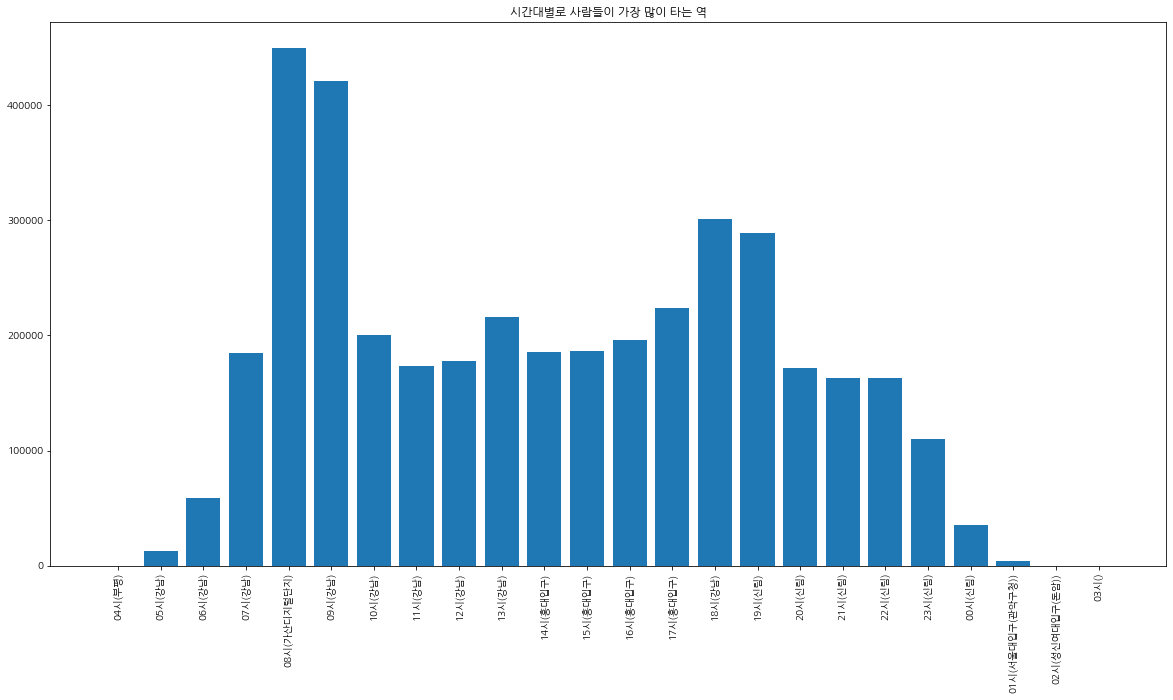

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('./Traffic_data/subwaytime.csv', encoding='cp949')
data = csv.reader(f)

label = []

yvalue = [0 for i in range(24)]
max_location = ['' for i in range(24)]
for i, row in enumerate(data):
    if i == 0:
        label = row[4:52:2]
    elif i == 1:
        continue
    else:
        row[4:] = map(int, row[4:])
        for j in range(24):
            if yvalue[j] < row[j*2 + 5]:
                yvalue[j] = row[j*2 + 5]
                max_location[j] = row[3]

xvalue = []
for v,l in zip(label, max_location):
    hour = v.split(':')[0]
    xvalue.append(f'{hour}시({l})')

plt.figure(figsize=(20,10))
plt.bar(xvalue, yvalue)
plt.xticks(rotation=90)
plt.title('시간대별로 사람들이 가장 많이 타는 역')
plt.rc('font', family='NanumGothic')
plt.rc('font', size=10)
plt.show()

# 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면

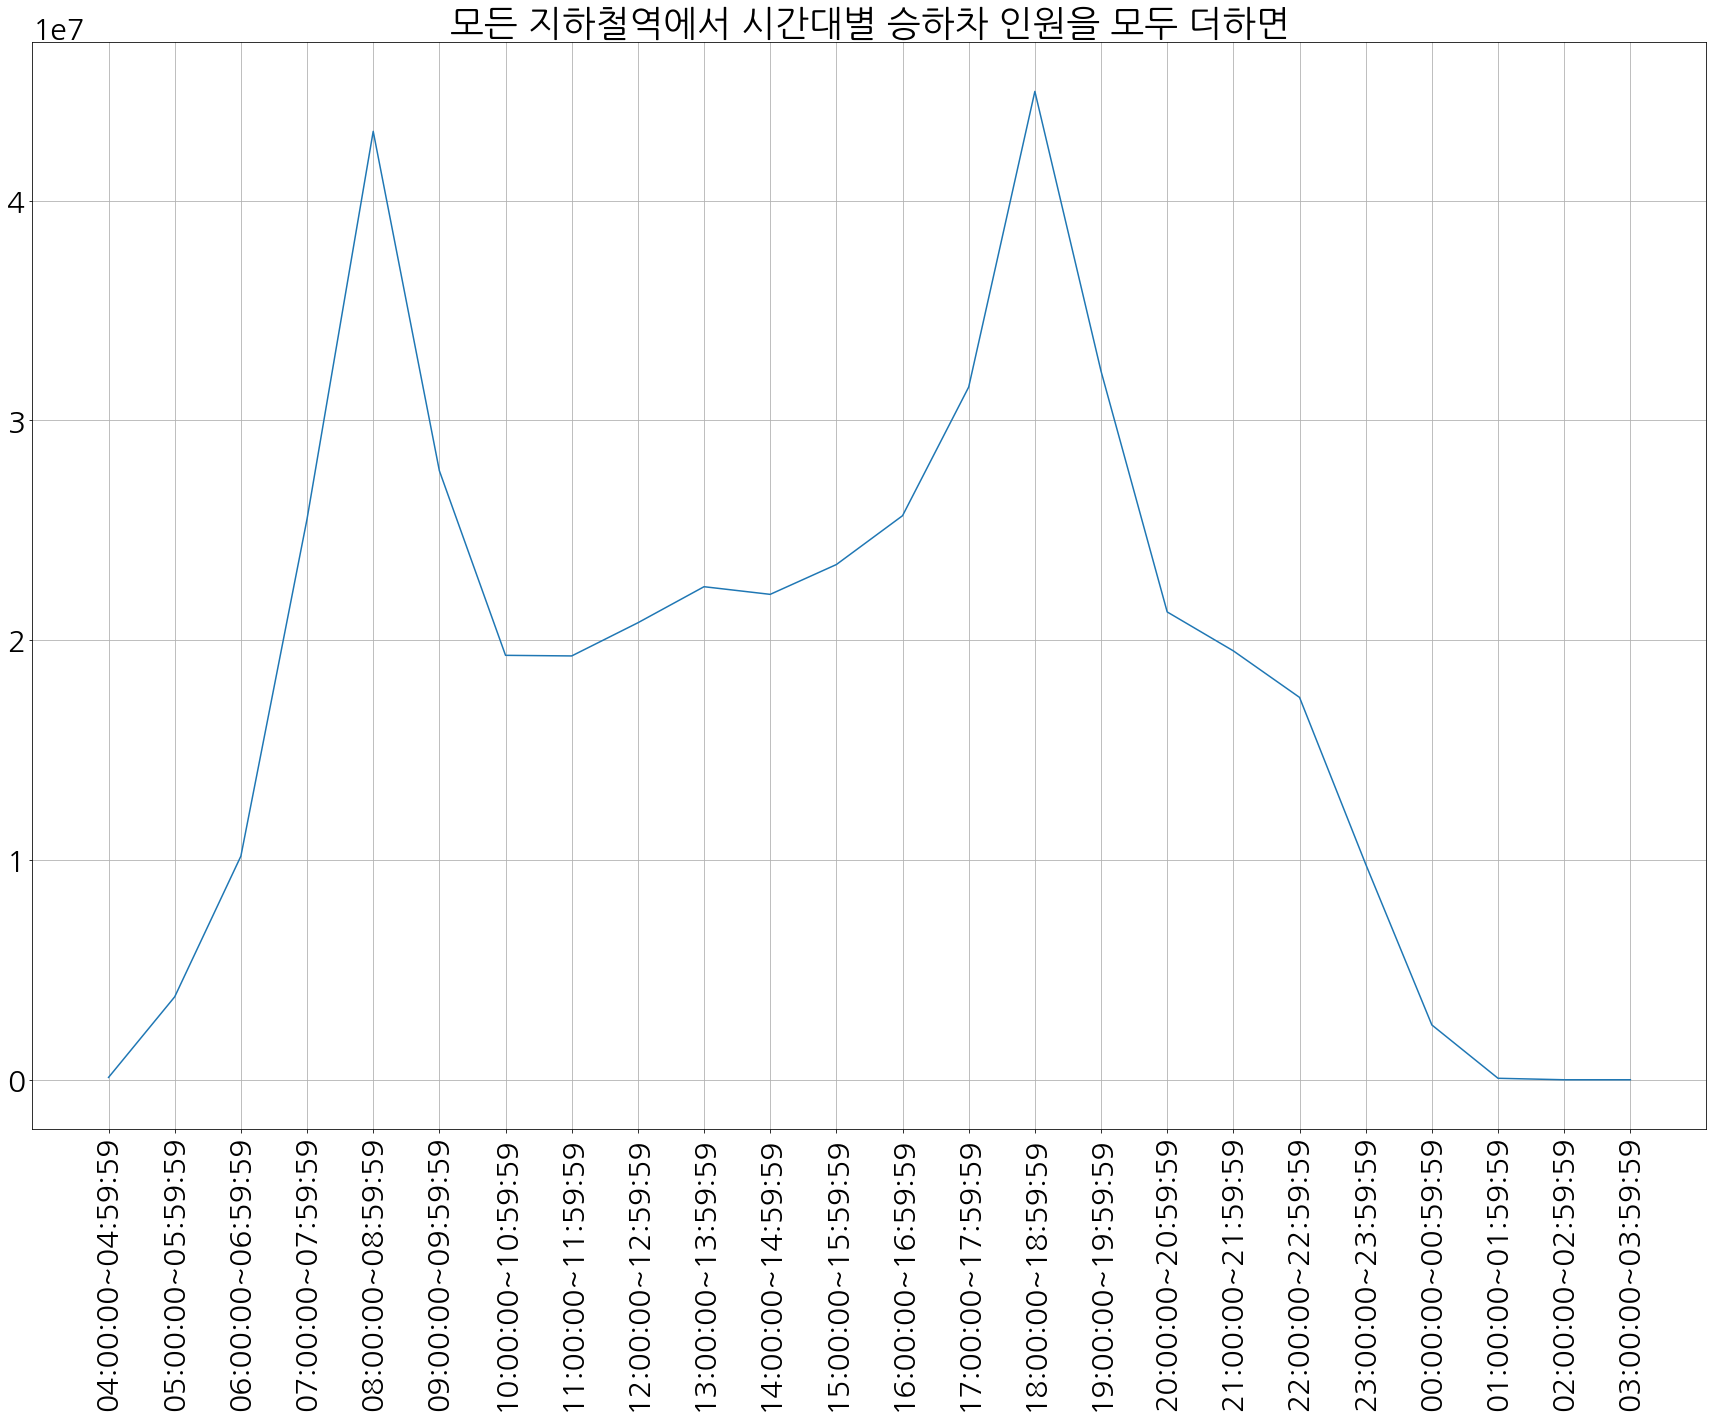

In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('./Traffic_data/subwaytime.csv', encoding='cp949')
data = csv.reader(f)

label = []

yvalue = [0 for i in range(48)]
for i, row in enumerate(data):
    if i == 0:
        label = row[4:52:2]
    elif i == 1:
        continue
    else:
        row[4:] = map(int, row[4:])
        for j in range(48):
            yvalue[j] += row[j+4]

y_array = np.array(yvalue).reshape(24,2)
sum_y = np.sum(y_array, axis=1)

x = np.arange(len(label))

plt.figure(figsize=(30,20))
plt.plot(label, sum_y)
plt.xticks(rotation=90)
plt.rc('font', family='NanumGothic')
plt.rc('font', size = 30)
plt.title('모든 지하철역에서 시간대별 승하차 인원을 모두 더하면')
plt.grid(True)
plt.show()

# pandas로 인구 구조 분석하기

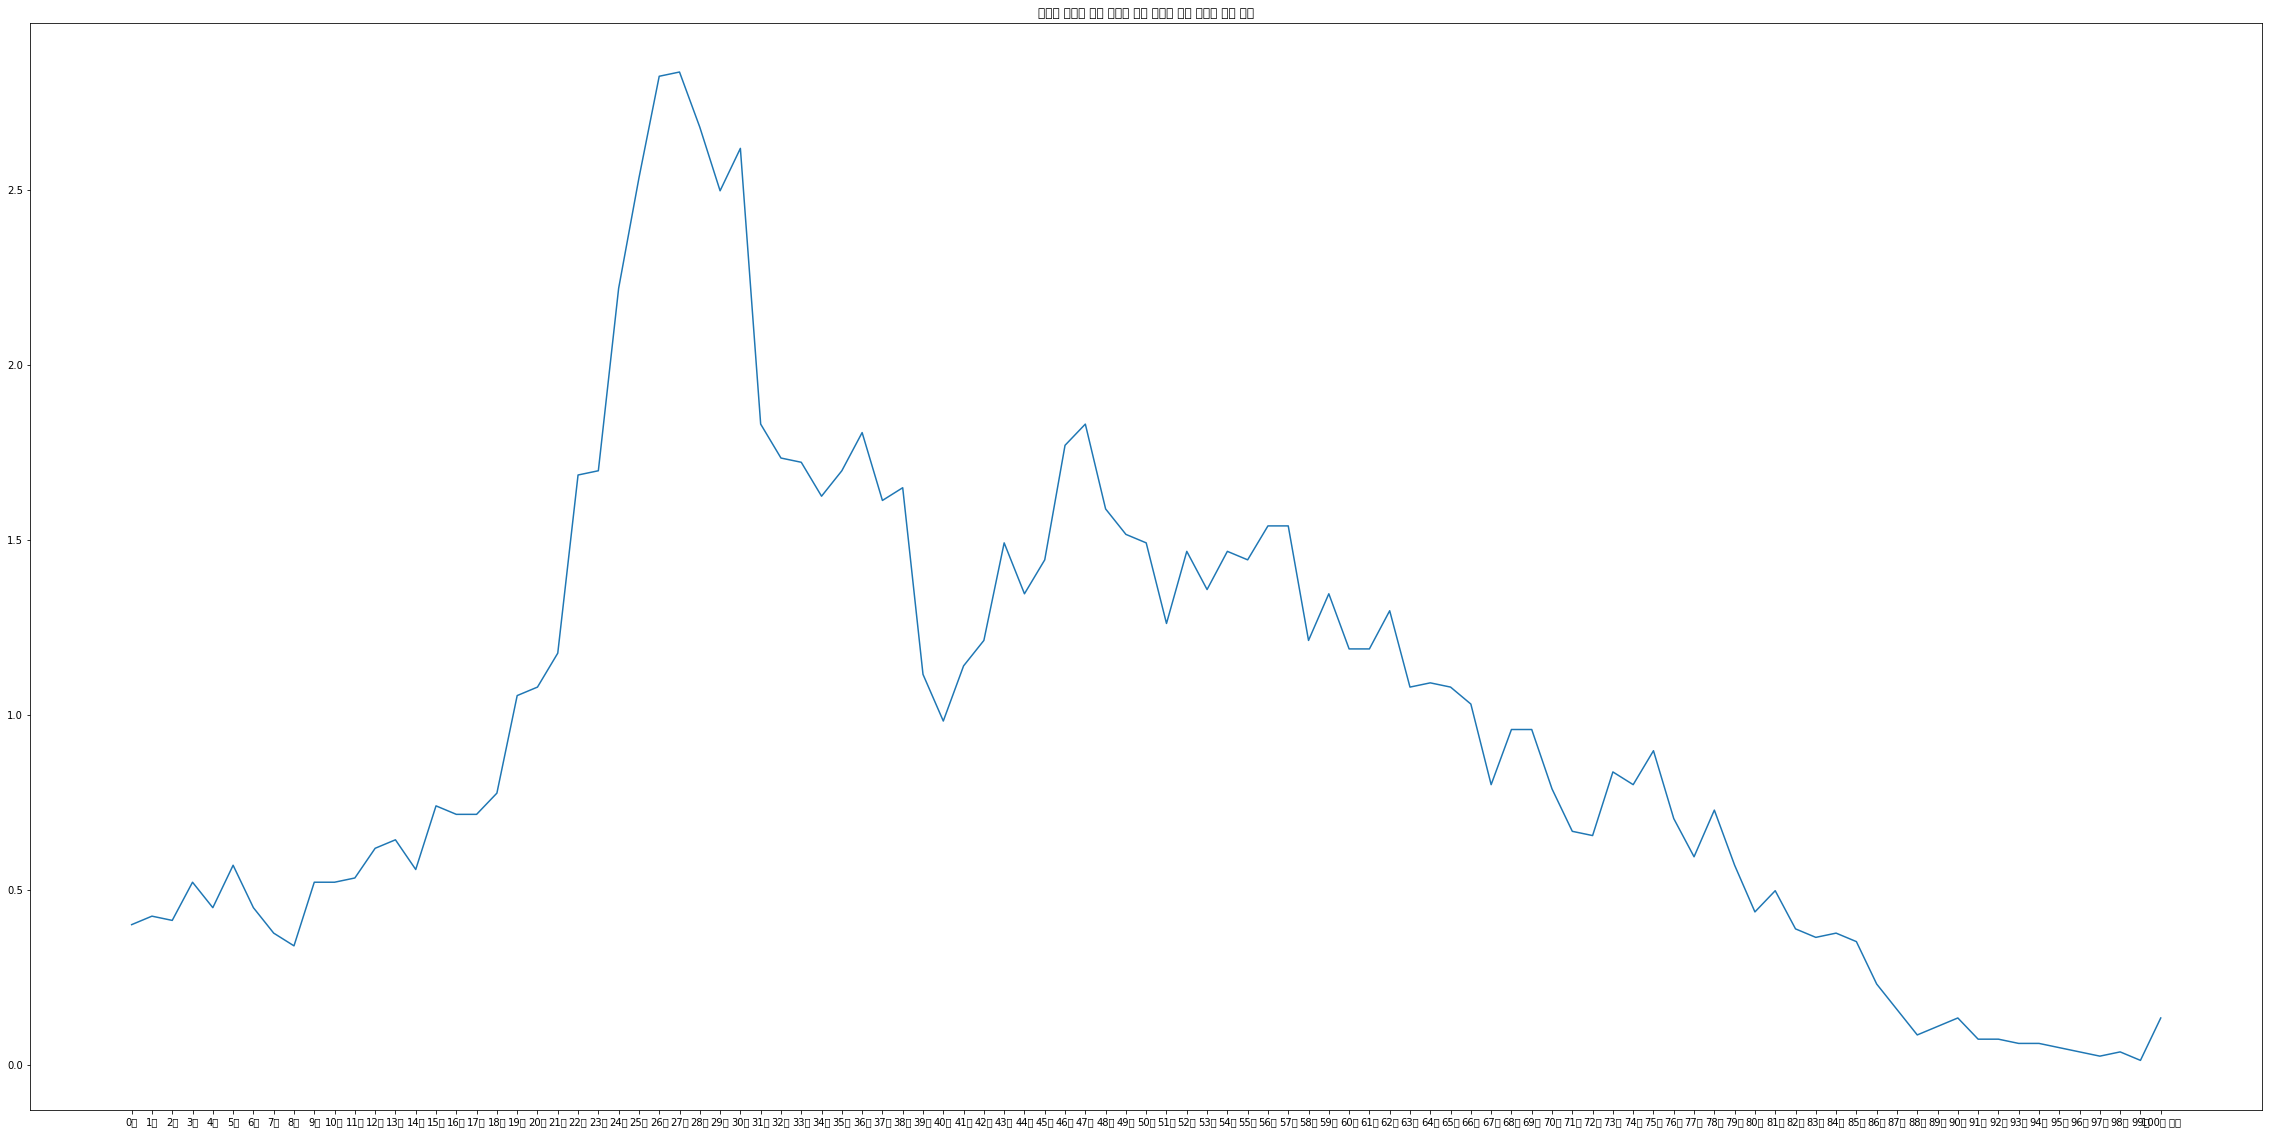

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./Data_Analysis_Project/age.csv', encoding='cp949', index_col=0)

df.drop('연령구간인구수', axis=1, inplace=True)
df = df.div(df[df.columns[0]], axis=0)
df.drop('총인구수', axis=1, inplace=True)
df = df.mul(100)

name = input()
a = df[df.index.str.contains(name)]

xvalue = a.columns.tolist()
yvalue = a.values.ravel().tolist()

plt.figure(figsize=(40,20))
plt.plot(xvalue, yvalue)
plt.rc('font', family='NanumGothic')
plt.rc('font', size=10)
plt.title('궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역')
plt.show()

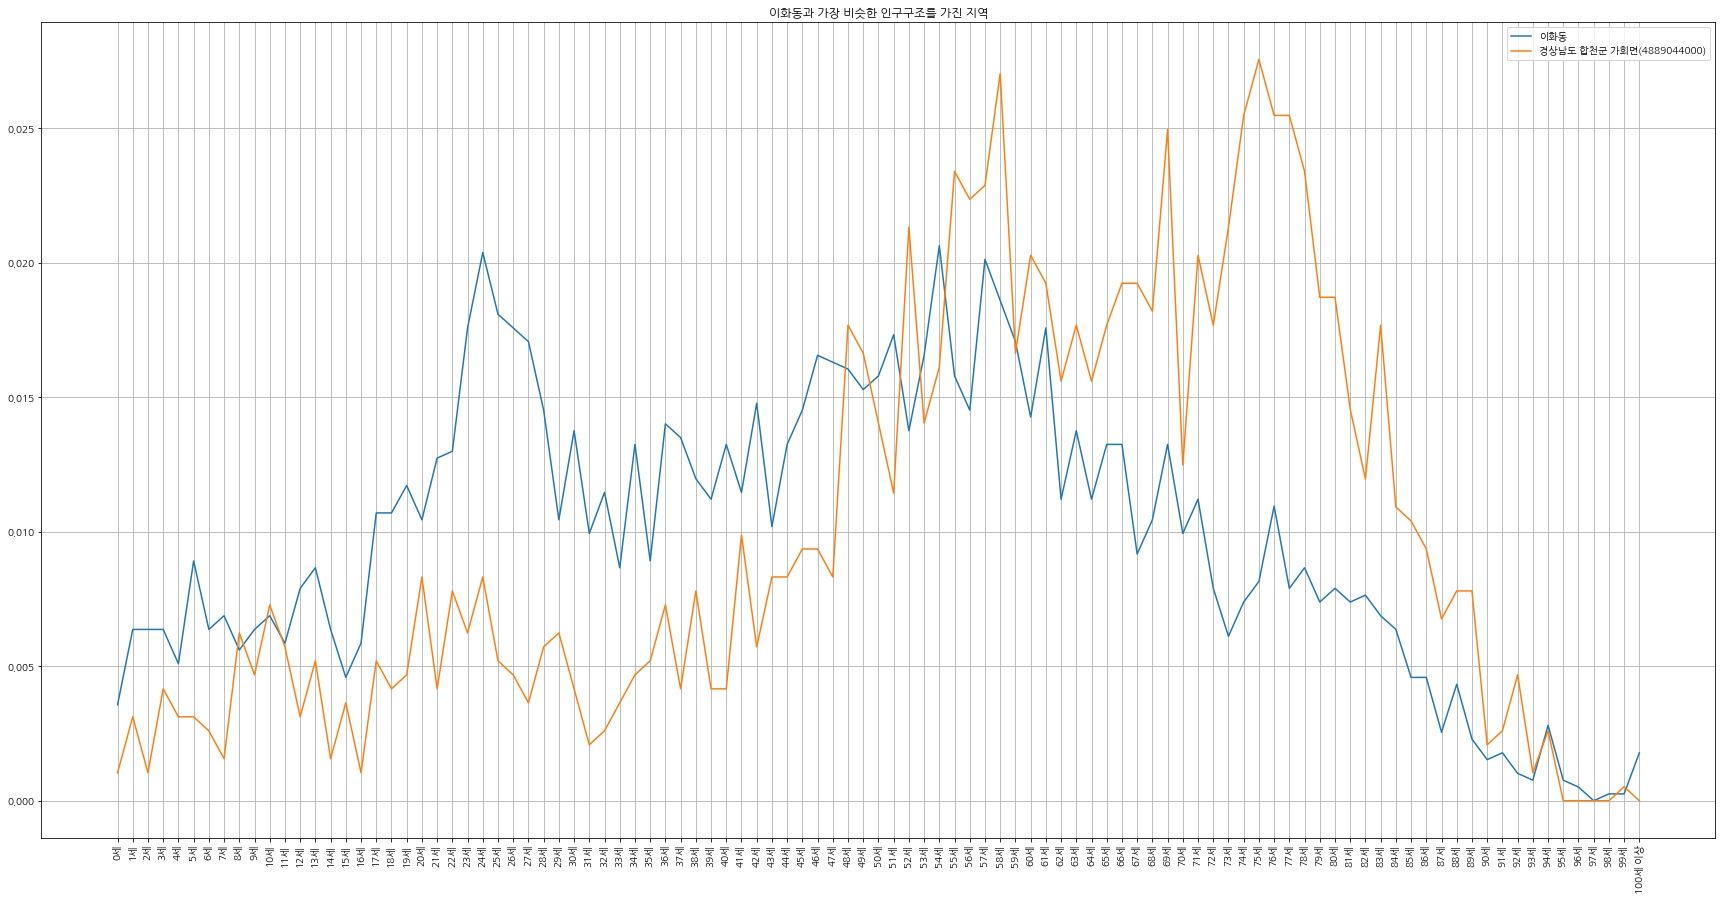

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./Data_Analysis_Project/age.csv', encoding='cp949', index_col=0)

df.drop('연령구간인구수', axis=1, inplace=True)
df = df.div(df[df.columns[0]], axis=0)
df.drop('총인구수', axis=1, inplace=True)

name = input('인구 구조가 알고 싶은 지역의 이름을 입력하세요 : ')
mn = 1
location = ''
rate = 0

indexs = df.index.tolist()
values = df.values

for l in df.index:
    if name in location:
        home = df.loc[l]

for i in range(len(indexs)):
    away = df.loc[indexs[i]]
    s = np.sum(home - away)
    if s < mn:
        mn = s
        location = indexs[i]
        rate = away

plt.figure(figsize=(30,15))
plt.plot(home, label=name)
plt.plot(rate, label=location)
plt.xticks(rotation = 90)
plt.title(name+'과 가장 비슷한 인구구조를 가진 지역')
plt.rc('font', family='NanumGothic')
plt.rc('font', size = 10)
plt.grid(True)
plt.legend()
plt.show()